### Hypothesis

The most common words in the abstracts of NeurIPS
papers from 2017–2019 show a noticeable evolution
compared to those from 2014–2016, reflecting the
rapidly changing landscape of machine learning re-
search in just a few years.

While earlier abstracts (2014–2016) commonly refer-
enced foundational models, optimization techniques,
and probabilistic methods, the later years (2017–2019)
exhibit a stronger emphasis on deep learning archi-
tectures, reinforcement learning, and emerging trends
such as attention mechanisms and adversarial robust-
ness.

## Pre-processing

In [4]:
import pandas as pd

In [7]:
neurips_papers = pd.read_csv("../kaggle/papers.csv")
neurips_papers

,source_id,year,title,abstract,full_text
0,27,1987,Bit-Serial Neural Networks,NaN,573 \n\nBIT - SERIAL NEURAL NETWORKS \n\nAlan...
1,63,1987,Connectivity Versus Entropy,NaN,1 \n\nCONNECTIVITY VERSUS ENTROPY \n\nYaser S...
2,60,1987,The Hopfield Model with Multi-Level Neurons,NaN,278 \n\nTHE HOPFIELD MODEL WITH MUL TI-LEVEL N...
3,59,1987,How Neural Nets Work,NaN,442 \n\nAlan Lapedes \nRobert Farber \n\nThe...
4,69,1987,Spatial Organization of Neural Networks: A Pro...,NaN,740 \n\nSPATIAL ORGANIZATION OF NEURAL NEn...
...,...,...,...,...,...
9675,5452,2019,Discrete Object Generation with Reversible Ind...,The success of generative modeling in continuo...,Discrete Object Generation\n\nwith Reversible ...
9676,4799,2019,Adaptively Aligned Image Captioning via Adapti...,Recent neural models for image captioning usua...,Adaptively Aligned Image Captioning via\n\nAda...
9677,1827,2019,Fully Dynamic Consistent Facility Location,We consider classic clustering problems in ful...,Fully Dynamic Consistent Facility Location\n\n...
9678,8693,2019,Efficient Rematerialization for Deep Networks,"When training complex neural networks, memory ...",Efﬁcient Rematerialization for Deep Networks\n...


In [14]:
year_and_abstract = neurips_papers[["year", "abstract"]]
print(year_and_abstract["abstract"].isnull().sum())
year_and_abstract = year_and_abstract.dropna()
year_and_abstract["year"].value_counts()

3319


year
2019    1428
2018    1009
2017     679
2016     569
2014     411
2015     403
2013     360
2012     342
2011     290
2010     288
2009     257
2008     222
2007      99
1997       2
2000       1
2001       1
Name: count, dtype: int64

### Note 

Here, we can observe that for a few years, we do not have an abstract in our current dataset.

In [33]:
year_filtered = year_and_abstract[year_and_abstract['year'].isin(range(2014, 2020))]

year_filtered 


,year,abstract
5181,2014,We investigate architectures of discriminative...
5182,2014,We consider the problem of online optimization...
5183,2014,The brain uses population codes to form distri...
5184,2014,Matching local visual features is a crucial pr...
5185,2014,"In this paper, we develop a family of algorith..."
...,...,...
9675,2019,The success of generative modeling in continuo...
9676,2019,Recent neural models for image captioning usua...
9677,2019,We consider classic clustering problems in ful...
9678,2019,"When training complex neural networks, memory ..."


## Analysis

In [34]:
import re
import string

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

year_filtered['clean_abstract'] = year_filtered['abstract'].apply(clean_text)

/var/folders/r4/6gw7r2mj0t5g7qss7k7160940000gn/T/ipykernel_57206/1266267448.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_filtered['clean_abstract'] = year_filtered['abstract'].apply(clean_text)


In [35]:
period_A = year_filtered[year_filtered['year'].isin([2014, 2015, 2016])]
period_B = year_filtered[year_filtered['year'].isin([2017, 2018, 2019])]

In [93]:
period_A

,year,abstract,clean_abstract
5181,2014,We investigate architectures of discriminative...,we investigate architectures of discriminative...
5182,2014,We consider the problem of online optimization...,we consider the problem of online optimization...
5183,2014,The brain uses population codes to form distri...,the brain uses population codes to form distri...
5184,2014,Matching local visual features is a crucial pr...,matching local visual features is a crucial pr...
5185,2014,"In this paper, we develop a family of algorith...",in this paper we develop a family of algorithm...
...,...,...,...
6559,2016,Spectral clustering and co-clustering are well...,spectral clustering and coclustering are wellk...
6560,2016,We develop a Bayesian model for decision-makin...,we develop a bayesian model for decisionmaking...
6561,2016,We study the problem of modeling spatiotempora...,we study the problem of modeling spatiotempora...
6562,2016,Neural networks (NN) have achieved state-of-th...,neural networks nn have achieved stateoftheart...


### Frequency

In [39]:
from collections import Counter
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from tqdm import tqdm

tqdm.pandas()

def get_normalized_word_freq(corpus):
    all_words = []
    for doc in tqdm(corpus, desc="Tokenizing abstracts"):
        words = doc.split()
        words = [word for word in words if word not in ENGLISH_STOP_WORDS and len(word) > 2]
        all_words.extend(words)

    word_counts = Counter(all_words)
    total_words = sum(word_counts.values())

    # Normalize frequencies
    normalized_freq = {word: count / total_words for word, count in word_counts.items()}
    return normalized_freq


freq_A = get_normalized_word_freq(period_A['clean_abstract'])
freq_B = get_normalized_word_freq(period_B['clean_abstract'])


Tokenizing abstracts: 100%|██████████| 3116/3116 [00:00<00:00, 84247.84it/s]


Here, we also normalize the words, because the number of papers published in era 1 is lesser than the number published in era 2.

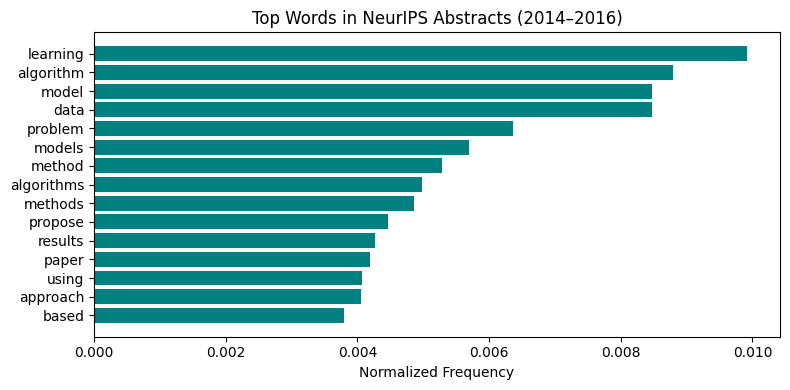

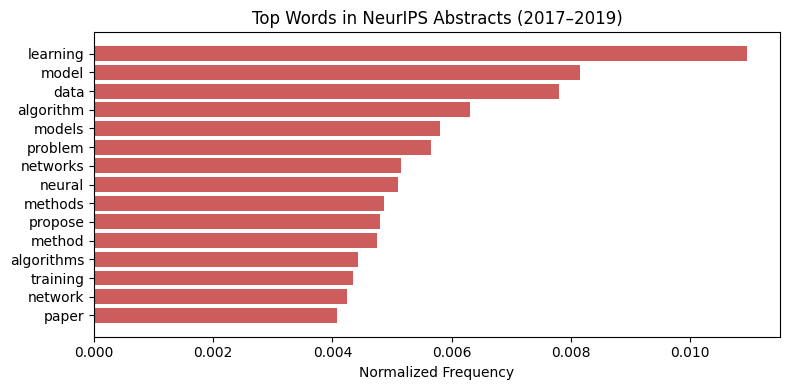

In [52]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_top_words(freq_dict, title, color):
    counter = Counter(freq_dict)  # Convert dict to Counter
    common_words = counter.most_common(15)
    words, counts = zip(*common_words)
    plt.figure(figsize=(8, 4))
    plt.barh(words[::-1], counts[::-1], color=color)
    plt.title(title)
    plt.xlabel("Normalized Frequency")
    plt.tight_layout()
    plt.show()


plot_top_words(freq_A, "Top Words in NeurIPS Abstracts (2014-2016)", "teal")
plot_top_words(freq_B, "Top Words in NeurIPS Abstracts (2017-2019)", "indianred")

Here, we can see that most of the top words are quite similiar, like, [learning, algorithm,	model, data, problem]. This makes sense as well as these are terms that are specific to the overall domain of machine learning.

### Log-Odds Value	

"> 0 (positive)	The word became more popular in 2017–19"

< 0 (negative)	The word was more common in 2014–16

≈ 0	The word usage was about the same in both periods

In [ ]:
import numpy as np
import pandas as pd

def compute_log_odds(freq_A, freq_B, eps=1):
    all_words = set(freq_A.keys()) | set(freq_B.keys())

    total_A = sum(freq_A.values())
    total_B = sum(freq_B.values())

    data = []
    for word in all_words:
        p_A = freq_A.get(word, 0) + eps
        p_B = freq_B.get(word, 0) + eps
        log_odds = np.log((p_B / total_B) / (p_A / total_A))
        data.append((word, log_odds, p_A, p_B))
    df = pd.DataFrame(data, columns=["word", "log_odds", "count_A", "count_B"])
    return df.sort_values("log_odds", ascending=False)


In [49]:
log_odds_df = compute_log_odds(freq_A, freq_B)
log_odds_df

[('threefold', np.float64(-2.774199421683696e-06), 1.000016962665174, 1.0000141884222475), ('expertconstructed', np.float64(-8.481296325552841e-06), 1.000008481332587, 1), ('raoblackwellized', np.float64(-1.3415421743617281e-05), 1.000016962665174, 1.000003547105562), ('composing', np.float64(1.1413920865306806e-05), 1.000016962665174, 1.0000283768444949), ('crossmodal', np.float64(3.763001283579585e-05), 1.000008481332587, 1.0000461123723041), ('pedestrians', np.float64(2.1599637417208794e-06), 1.000008481332587, 1.0000106413166856), ('componentwise', np.float64(-8.481296325552841e-06), 1.000008481332587, 1), ('pharmacokineticpharmacodynamic', np.float64(3.547099566072887e-06), 1, 1.000003547105562), ('offtheshell', np.float64(3.547099566072887e-06), 1, 1.000003547105562), ('mathbfx', np.float64(1.4188321887923041e-05), 1, 1.0000141884222475), ('unexploited', np.float64(-8.481296325552841e-06), 1.000008481332587, 1), ('caffe', np.float64(3.547099566072887e-06), 1, 1.000003547105562), 

,word,log_odds,count_A,count_B
20587,networks,0.001696,1.003443,1.005147
14277,training,0.001554,1.002782,1.004342
14450,neural,0.001429,1.003672,1.005108
3737,tasks,0.001328,1.001968,1.003299
14594,adversarial,0.001318,1.000458,1.001777
...,...,...,...,...
21505,general,-0.000983,1.002358,1.001373
18965,problems,-0.000988,1.003588,1.002596
8742,inference,-0.001171,1.003316,1.002142
13814,matrix,-0.001216,1.002680,1.001461


/var/folders/r4/6gw7r2mj0t5g7qss7k7160940000gn/T/ipykernel_57206/2604473291.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_words, y="word", x="log_odds", palette="cool", dodge=False)


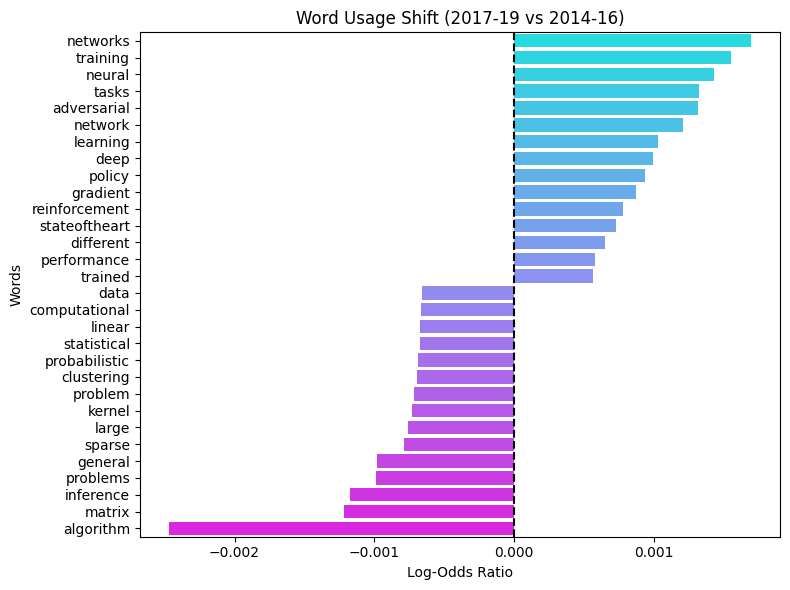

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_word_shift(df, top_n=15):
    top_words = pd.concat([
        df.head(top_n),     # Words more common in 2017–19
        df.tail(top_n)      # Words more common in 2014–16
    ])
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(data=top_words, y="word", x="log_odds", palette="cool", dodge=False)
    plt.axvline(0, color='black', linestyle='--')
    plt.title("Word Usage Shift (2017-19 vs 2014-16)")
    plt.xlabel("Log-Odds Ratio")
    plt.ylabel("Words")


    plt.tight_layout()
    plt.show()
plot_word_shift(log_odds_df)

In [92]:
top_n = 15
top_words = pd.concat([
        log_odds_df.head(top_n),     # Words more common in 2017–19
        log_odds_df.tail(top_n)      # Words more common in 2014–16
    ])
unique_words_era2 = set(top_words["word"].head(top_n))
unique_words_era1 = set(top_words["word"].tail(top_n))
unique_words_era2, unique_words_era1

({'adversarial',
  'deep',
  'different',
  'gradient',
  'learning',
  'network',
  'networks',
  'neural',
  'performance',
  'policy',
  'reinforcement',
  'stateoftheart',
  'tasks',
  'trained',
  'training'},
 {'algorithm',
  'clustering',
  'computational',
  'data',
  'general',
  'inference',
  'kernel',
  'large',
  'linear',
  'matrix',
  'probabilistic',
  'problem',
  'problems',
  'sparse',
  'statistical'})

This tells us a lot. 

## N-gram

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from itertools import combinations
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
import re

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

#Function for n-gram analysis
def analyze_ngrams(df_A, df_B, n=2, top_n=30):
    """
    Analyze and compare n-grams between two periods.
    
    Args:
        df_A: DataFrame with 'clean_abstract' column for period A
        df_B: DataFrame with 'clean_abstract' column for period B
        n: Size of n-grams (default: 2 for bigrams)
        top_n: Number of top n-grams to return
        
    Returns:
        DataFrame with n-gram comparison statistics
    """

    stop_words = set(stopwords.words('english'))
    
    abstracts_A = ' '.join(df_A['clean_abstract'].astype(str).tolist())
    abstracts_B = ' '.join(df_B['clean_abstract'].astype(str).tolist())
    
    #Function to extract n-grams
    def get_ngrams(text, n):

        words = re.findall(r'\b\w+\b', text.lower())

        filtered_words = [word for word in words if word not in stop_words and len(word) > 2]

        n_grams = list(ngrams(filtered_words, n))

        n_gram_strings = [' '.join(gram) for gram in n_grams]
        return Counter(n_gram_strings)
    

    ngram_freq_A = get_ngrams(abstracts_A, n)
    ngram_freq_B = get_ngrams(abstracts_B, n)
    
    #Compute log odds (with Laplace smoothing)
    def compute_log_odds(freq_A, freq_B, eps=1):
        all_ngrams = set(freq_A.keys()) | set(freq_B.keys())
        
        total_A = sum(freq_A.values())
        total_B = sum(freq_B.values())
        
        data = []
        for ngram in all_ngrams:
            p_A = freq_A.get(ngram, 0) + eps
            p_B = freq_B.get(ngram, 0) + eps
            
            #Normalized frequencies
            norm_A = p_A / total_A
            norm_B = p_B / total_B
            
            #Log odds
            log_odds = np.log(norm_B / norm_A)
            
            #Calculate absolute frequency for both periods
            freq_A_abs = freq_A.get(ngram, 0)
            freq_B_abs = freq_B.get(ngram, 0)
            
            #Only include ngrams that appear at least 5 times in one period
            if max(freq_A_abs, freq_B_abs) >= 5:
                data.append((ngram, log_odds, freq_A_abs, freq_B_abs, norm_A, norm_B))
                
        df = pd.DataFrame(data, columns=["ngram", "log_odds", "count_A", "count_B", "freq_A", "freq_B"])
        return df.sort_values("log_odds", ascending=False)
    
    #Compute log odds
    log_odds_df = compute_log_odds(ngram_freq_A, ngram_freq_B)
    
    #Get top_n ngrams for each period
    rising_ngrams = log_odds_df.head(top_n)  
    declining_ngrams = log_odds_df.tail(top_n).iloc[::-1]  
    
    return log_odds_df, rising_ngrams, declining_ngrams

#visualize the network
def visualize_network(G, title, output_file=None, node_size_factor=50, edge_width_factor=0.5):
    """
    Visualize network with node sizes proportional to word frequency and edge width 
    proportional to co-occurrence frequency.
    """
    plt.figure(figsize=(16, 12))
    

    node_sizes = [G.nodes[node]['count'] / node_size_factor for node in G.nodes()]
    

    edge_widths = [G[u][v]['weight'] * edge_width_factor for u, v in G.edges()]
    

    pos = nx.spring_layout(G, k=0.3, iterations=50, seed=42)
    
    #color scheme (Teal and Indiana Red)
    node_color = '#008080'  #Teal
    edge_color = '#9B1B30'  #Indiana Red
    

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, alpha=0.7, node_color=node_color)
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.4, edge_color=edge_color)
    nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    
    plt.title(title, fontsize=16)
    plt.axis('off')
    
    if output_file:
        plt.savefig(output_file, bbox_inches='tight', dpi=300)
    
    plt.show()


def run_ngram_analysis(period_A, period_B):
    """Run complete n-gram analysis for periods A and B"""
    print("Running bigram analysis...")
    log_odds_bigram, rising_bigrams, declining_bigrams = analyze_ngrams(period_A, period_B, n=2, top_n=20)
    
    print("Running trigram analysis...")
    log_odds_trigram, rising_trigrams, declining_trigrams = analyze_ngrams(period_A, period_B, n=3, top_n=20)
    

    plt.figure(figsize=(14, 8))
    

    plt.subplot(2, 2, 1)
    sns.barplot(x='log_odds', y='ngram', data=rising_bigrams.head(10), color='#008080')  # Teal
    plt.title('Top Rising Bigrams', fontsize=14)
    plt.xlabel('Log Odds Ratio')

    plt.subplot(2, 2, 2)
    sns.barplot(x='log_odds', y='ngram', data=declining_bigrams.head(10), color='#9B1B30')  # Indiana Red
    plt.title('Top Declining Bigrams', fontsize=14)
    plt.xlabel('Log Odds Ratio')
    
    plt.subplot(2, 2, 3)
    sns.barplot(x='log_odds', y='ngram', data=rising_trigrams.head(10), color='#008080')  # Teal
    plt.title('Top Rising Trigrams', fontsize=14)
    plt.xlabel('Log Odds Ratio')
    
    plt.subplot(2, 2, 4)
    sns.barplot(x='log_odds', y='ngram', data=declining_trigrams.head(10), color='#9B1B30')  # Indiana Red
    plt.title('Top Declining Trigrams', fontsize=14)
    plt.xlabel('Log Odds Ratio')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'bigrams': {
            'log_odds': log_odds_bigram,
            'rising': rising_bigrams,
            'declining': declining_bigrams
        },
        'trigrams': {
            'log_odds': log_odds_trigram,
            'rising': rising_trigrams,
            'declining': declining_trigrams
        }
    }

def run_network_analysis(period_A, period_B):
    """Run complete network analysis for periods A and B"""
    print("Creating co-occurrence network for period A...")
    G_A = create_cooccurrence_network(period_A, top_n=80, min_cooccurrence=3)
    
    print("Creating co-occurrence network for period B...")
    G_B = create_cooccurrence_network(period_B, top_n=80, min_cooccurrence=3)
    
    print(f"Period A network: {G_A.number_of_nodes()} nodes, {G_A.number_of_edges()} edges")
    print(f"Period B network: {G_B.number_of_nodes()} nodes, {G_B.number_of_edges()} edges")
    
    visualize_network(G_A, f"NeurIPS Co-occurrence Network (2014-2016)", "network_period_A.png")
    visualize_network(G_B, f"NeurIPS Co-occurrence Network (2017-2019)", "network_period_B.png")
    
    comparison_df = compare_networks(G_A, G_B)
    
    top_rising = comparison_df.sort_values('centrality_change', ascending=False).head(15)
    top_falling = comparison_df.sort_values('centrality_change', ascending=True).head(15)
    
    plt.figure(figsize=(14, 6))
    
    plt.subplot(1, 2, 1)
    sns.barplot(x='centrality_change', y='term', data=top_rising, color='#008080')  # Teal
    plt.title('Terms with Increasing Centrality', fontsize=14)
    plt.xlabel('Change in Degree Centrality')
    
    plt.subplot(1, 2, 2)
    sns.barplot(x='centrality_change', y='term', data=top_falling, color='#9B1B30')  # Indiana Red
    plt.title('Terms with Decreasing Centrality', fontsize=14)
    plt.xlabel('Change in Degree Centrality')
    
    plt.tight_layout()
    plt.show()
    
    return {
        'network_A': G_A,
        'network_B': G_B,
        'comparison': comparison_df
    }

Creating co-occurrence network for period A...
Creating co-occurrence network for period B...
Period A network: 80 nodes, 3159 edges
Period B network: 80 nodes, 3160 edges


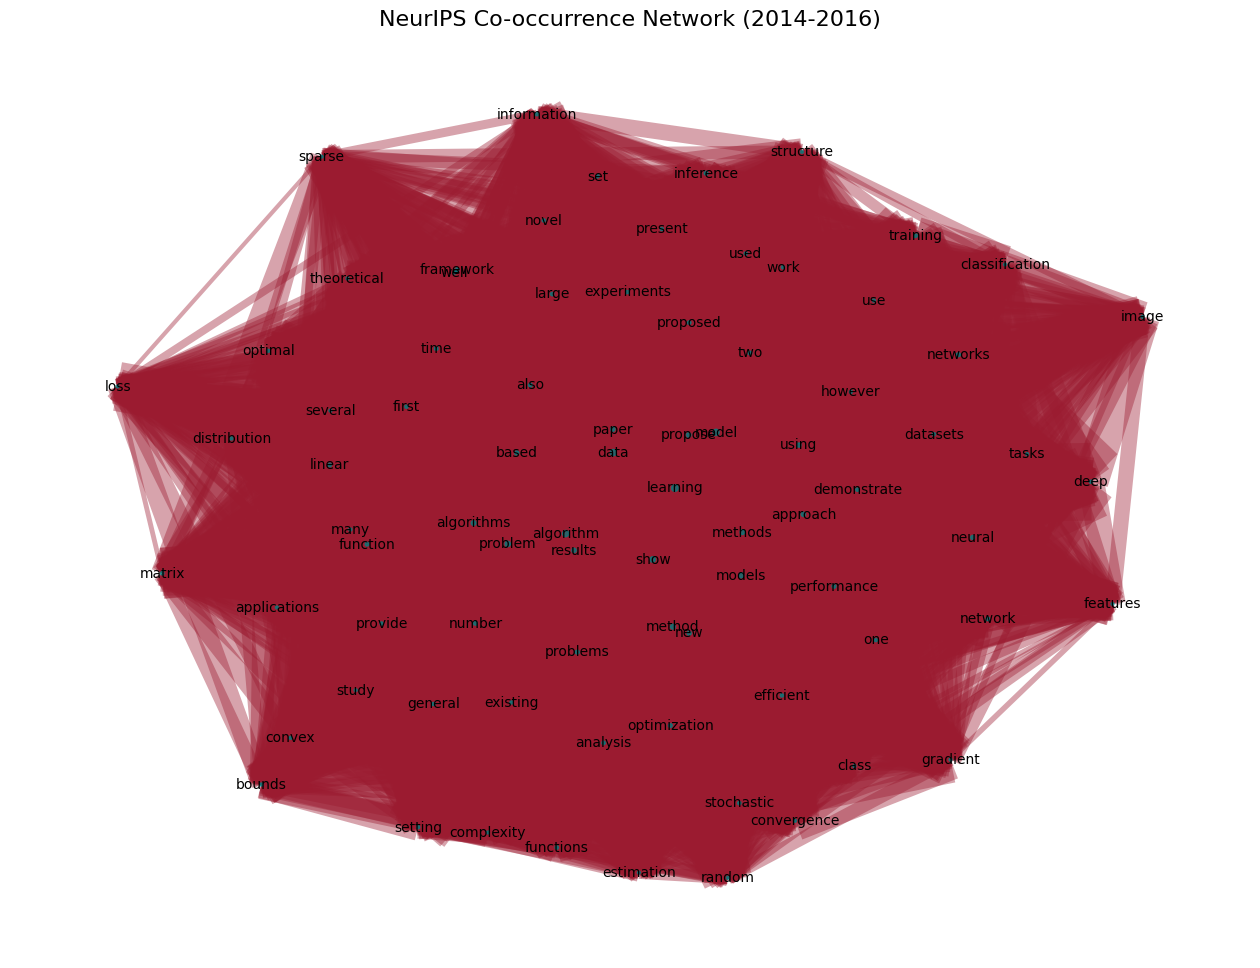

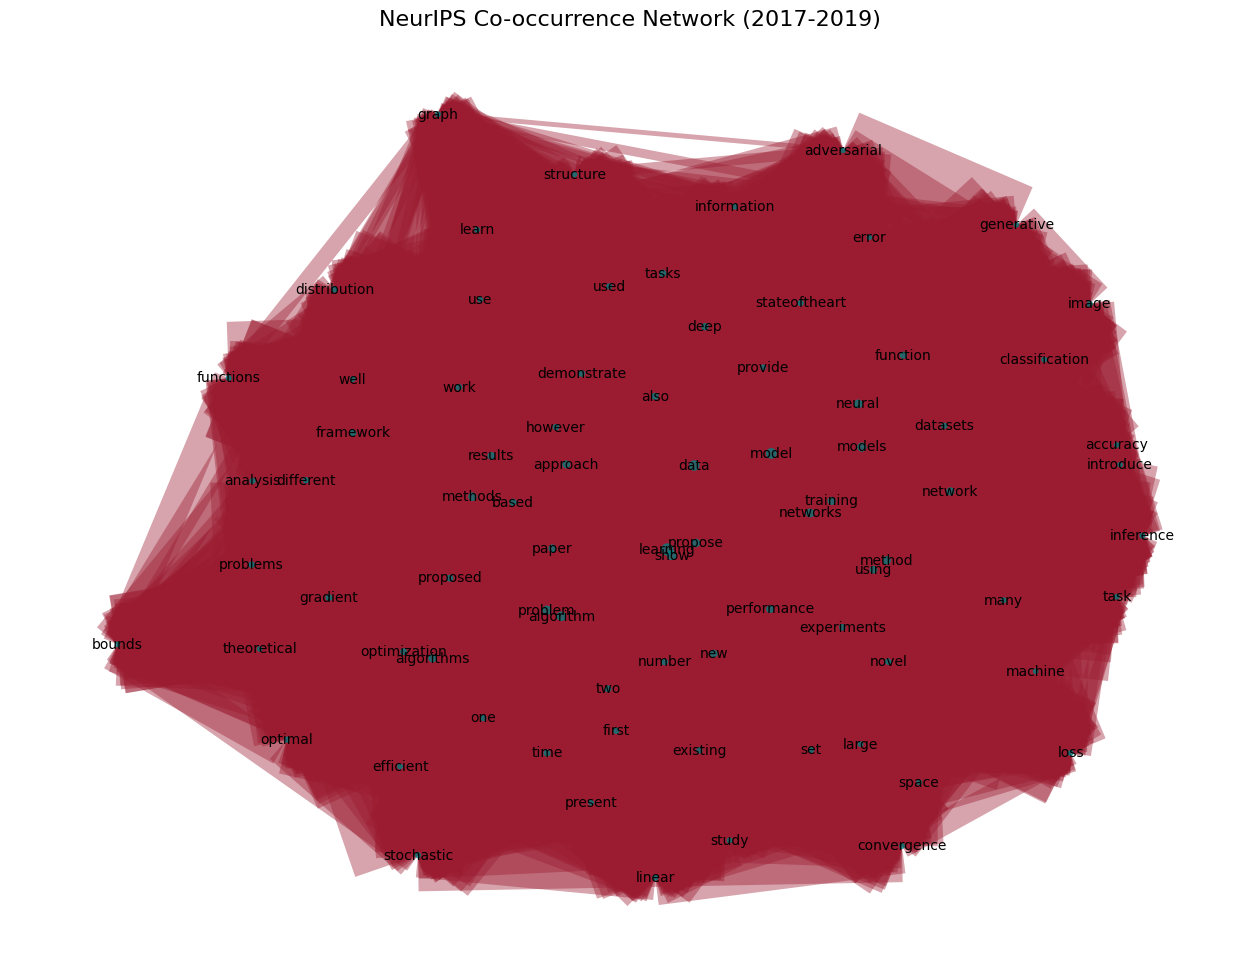

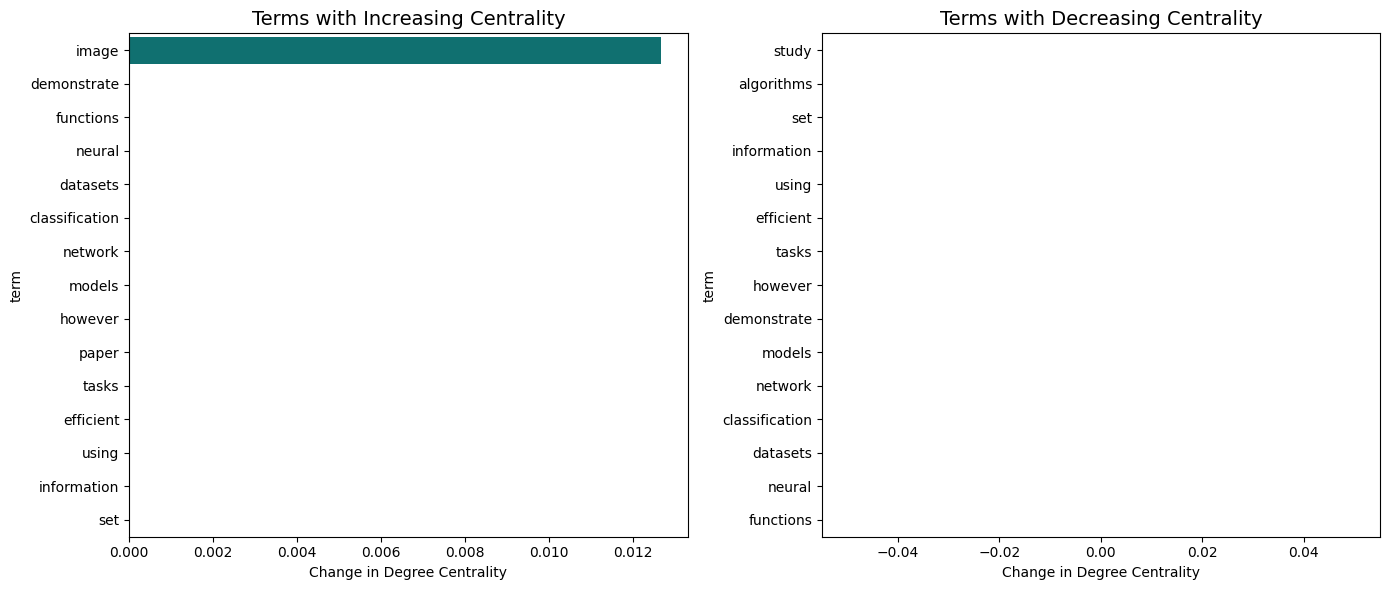

In [109]:
network_results = run_network_analysis(period_A, period_B)

Running bigram analysis...
Running trigram analysis...


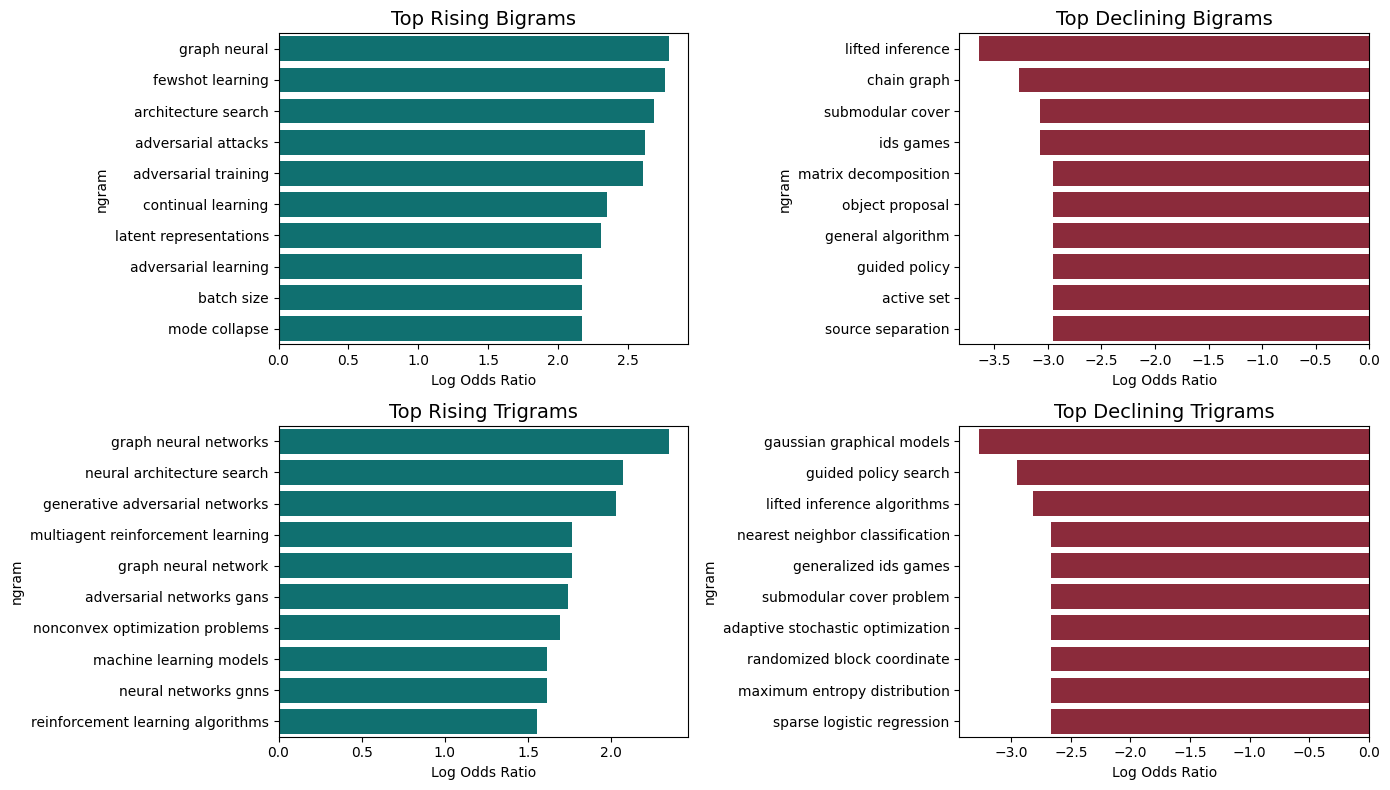

In [110]:
ngram_results = run_ngram_analysis(period_A, period_B)